In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('miami-dca.csv')

In [3]:
data

,Unnamed: 0,HSpeed,VSpeed,abpVersion,acpuVersion,airlineCode,airlineCodeIata,airlineName,altitude,departureAirportCode,...,flightNumberAlpha,flightNumberInfo,flightNumberNumeric,latitude,localTime,longitude,origin,tailNumber,utcTime,videoService
0,0,256.5570,-0.77216,4.0.4,6.4.0,AAL,AA,American Airlines,9443.6180,KMIA,...,AAL,AAL1359,1359,33.3140,2016-06-06T12:18:03.336Z0:0,-79.9612,MIA,N905AN,2016-06-06T12:18:03.336Z,False
1,0,256.5570,-0.77216,4.0.4,6.4.0,AAL,AA,American Airlines,9443.6180,KMIA,...,AAL,AAL1359,1359,33.3140,2016-06-06T12:18:03.336Z0:0,-79.9612,MIA,N905AN,2016-06-06T12:18:03.336Z,False
2,0,232.5731,-4.78536,4.0.4,6.4.0,AAL,AA,American Airlines,7871.1553,KMIA,...,AAL,AAL1359,1359,37.2739,2016-06-06T12:50:06.219Z0:0,-77.5992,MIA,N905AN,2016-06-06T12:50:06.219Z,False
3,0,209.0393,-6.77672,4.0.4,6.4.0,AAL,AA,American Airlines,6322.4663,KMIA,...,AAL,AAL1359,1359,37.6186,2016-06-06T12:53:08.306Z0:0,-77.4406,MIA,N905AN,2016-06-06T12:53:08.306Z,False
4,0,175.5390,-12.34440,4.0.4,6.4.0,AAL,AA,American Airlines,4764.6340,KMIA,...,AAL,AAL1359,1359,38.0951,2016-06-06T12:58:02.449Z0:0,-77.2936,MIA,N905AN,2016-06-06T12:58:02.449Z,False


In [42]:
import os
import us
import requests, zipfile, StringIO
import fiona
import shapely

def get_states():
    contiguous = [state for state in us.states.STATES if state.is_contiguous]
    shapefiles = [state.shapefile_urls()['state'] for state in contiguous]

    return dict(zip(contiguous, shapefiles))

def get_boundaries(states):
    """Takes in a dictionary with states and zip files, returns a dictionarty with states and boundaries"""
    # Download zip file
    # unzip it and open it with shapely
    output = {}
    for state, zip_file_url in states.iteritems():
        path = '/tmp/%s' % state.name
        if os.path.exists(path):
            continue
        r = requests.get(zip_file_url, stream=True)
        z = zipfile.ZipFile(StringIO.StringIO(r.content))
        z.extractall(path)
        shapes = [x for x in z.namelist() if '.shp' in x]
        shapefile = os.path.join(path, shapes[0])
        geom = fiona.open(shapefile)
        output[state.name] = geom.bounds
        geom.close()
    return output

In [19]:
states = get_boundaries(get_states())

In [61]:
def patches(states):
    output = []
    for state, bounds in states.iteritems():
        min_lon, min_lat, max_lon, max_lat = bounds
        state_data = data[(data.latitude < max_lat) & (data.latitude > min_lat) & (data.longitude > min_lon) & (data.longitude < max_lon)]
        if len(state_data) > 0:
            print state, len(state_data)
            patch = PolygonPatch(shapely.geometry.box(*bounds), fc='#f7f7f7', ec='#cccccc', zorder=0)
            output.append(patch)
    return output

In [15]:
example.bounds

(-116.050002, 44.358208999999995, -104.039138, 49.00139)

In [46]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt, matplotlib.font_manager as fm
from time import time
from shapely.geometry import Polygon, Point
from geopandas import GeoDataFrame
from descartes import PolygonPatch

In [47]:
# specify the fonts and background color for our map
title_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=15, weight='normal', stretch='normal')
annotation_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
backgroundcolor = '#e4f4ff'

In [48]:
# create a geometry column in our point data set for geopandas to use
data['geometry'] = data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

In [50]:
points = GeoDataFrame(data)

In [51]:
# you must specify its original CRS to convert it to a different (projected) one later
points.crs = {'datum':'WGS84', 'no_defs':True, 'proj':'aea', 'lat_1':35, 'lat_2':55, 'lat_0':45, 'lon_0':10}
points.head()

,Unnamed: 0,HSpeed,VSpeed,abpVersion,acpuVersion,airlineCode,airlineCodeIata,airlineName,altitude,departureAirportCode,...,flightNumberInfo,flightNumberNumeric,latitude,localTime,longitude,origin,tailNumber,utcTime,videoService,geometry
0,0,256.5570,-0.77216,4.0.4,6.4.0,AAL,AA,American Airlines,9443.6180,KMIA,...,AAL1359,1359,33.3140,2016-06-06T12:18:03.336Z0:0,-79.9612,MIA,N905AN,2016-06-06T12:18:03.336Z,False,POINT (-79.96120000000001 33.314)
1,0,256.5570,-0.77216,4.0.4,6.4.0,AAL,AA,American Airlines,9443.6180,KMIA,...,AAL1359,1359,33.3140,2016-06-06T12:18:03.336Z0:0,-79.9612,MIA,N905AN,2016-06-06T12:18:03.336Z,False,POINT (-79.96120000000001 33.314)
2,0,232.5731,-4.78536,4.0.4,6.4.0,AAL,AA,American Airlines,7871.1553,KMIA,...,AAL1359,1359,37.2739,2016-06-06T12:50:06.219Z0:0,-77.5992,MIA,N905AN,2016-06-06T12:50:06.219Z,False,POINT (-77.5992 37.2739)
3,0,209.0393,-6.77672,4.0.4,6.4.0,AAL,AA,American Airlines,6322.4663,KMIA,...,AAL1359,1359,37.6186,2016-06-06T12:53:08.306Z0:0,-77.4406,MIA,N905AN,2016-06-06T12:53:08.306Z,False,POINT (-77.4406 37.6186)
4,0,175.5390,-12.34440,4.0.4,6.4.0,AAL,AA,American Airlines,4764.6340,KMIA,...,AAL1359,1359,38.0951,2016-06-06T12:58:02.449Z0:0,-77.2936,MIA,N905AN,2016-06-06T12:58:02.449Z,False,POINT (-77.2936 38.0951)


In [58]:
# calculate some margin so our data doesn't go right up to the edges of the plotting figure
x_margin_width = (points.bounds['maxx'].max() - points.bounds['minx'].min()) / 10
y_margin_width = (points.bounds['maxy'].max() - points.bounds['miny'].min()) / 3

# define the coordinates at the extent of our projected point data
xlim = (points.bounds['minx'].min() - x_margin_width, points.bounds['maxx'].max() + x_margin_width)
ylim = (points.bounds['miny'].min() - y_margin_width, points.bounds['maxy'].max() + y_margin_width)

# create a rectangle from these coordinates
spatial_extent = Polygon([(xlim[0], ylim[0]), 
                          (xlim[0], ylim[1]), 
                          (xlim[1], ylim[1]),
                          (xlim[1], ylim[0])])

# set dimensions in inches for the plotting figure size
xdim = (xlim[1] - xlim[0]) / 400000
ydim = (ylim[1] - ylim[0]) / 400000

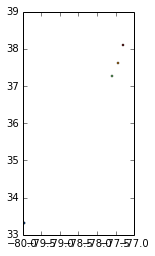

In [65]:
points.plot()

In [72]:
# create a figure, axis, and set the background color
fig2 = plt.figure(figsize=(xdim, ydim))
ax = fig2.add_subplot(111)
ax.set_axis_bgcolor(backgroundcolor)

# add each patch we extracted from the GeoDataFrame's geometry column to the axis
#for patch in patches(states):
#    ax.add_patch(patch)

# add the projected point data to the axis as a scatter plot
#points_scatter = ax.scatter(x=points['longitude'], y=points['latitude'], c='m', alpha=0.4, s=100)

#ax.set_title('Projected shapefile and GPS coordinates', fontproperties=title_font)

# set the axes limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# remove the tickmarks as these are projected geometries, the ticks are confusing northings/eastings
ax.set_xticks([])
ax.set_yticks([])

plt.show()

RuntimeError: Error building image